# Exploratory Data Analysis (EDA)

1.ทำความเข้าใจกับข้อมูล (Understand the data)

2.สรุปสถิติ (Summary statistics)

3.ตรวจสอบค่าที่หายไป (Missing values)

4.วิเคราะห์การกระจายของข้อมูล (Distribution)

5.ตรวจสอบความสัมพันธ์ระหว่างตัวแปร (Correlation)

6.ตรวจสอบ balance ของ target (สำหรับ classification)

7.ตรวจสอบ outliers และ anomalies


In [1]:
#!git clone https://github.com/SparklePh/KMITL-Workshop-yolo-car-counting

Cloning into 'KMITL-Workshop-yolo-car-counting'...
remote: Enumerating objects: 2698, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 2698 (delta 1), reused 8 (delta 0), pack-reused 2688 (from 2)
Receiving objects: 100% (2698/2698), 196.14 MiB | 13.89 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (6113/6113), done.


In [2]:
%cd KMITL-Workshop-yolo-car-counting

/content/KMITL-Workshop-yolo-car-counting


In [3]:
import pandas as pd
import seaborn as sns

# Load Data

In [4]:
#loading dataset
df = pd.read_csv("data/diabetes_dataset.csv")

# 1.Understand the data

## Context
This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases**.  
The objective is to predict, based on diagnostic measurements, whether a patient has diabetes.

## Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



- Pregnancies: Number of times pregnant (จำนวนครั้งที่ตั้งครรภ์)
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (ความเข้มข้นของน้ำตาลในเลือด)
- BloodPressure: Diastolic blood pressure (mm Hg) (ความดันเลือด)
- SkinThickness: Triceps skin fold thickness (mm) (ความหนาผิวหนังที่ triceps)
- Insulin: 2-Hour serum insulin (mu U/ml) (ระดับอินซูลิน)
- BMI: Body mass index (weight in kg/(height in m)^2) (ดัชนีมวลกาย)
- DiabetesPedigreeFunction: Diabetes pedigree function (การถ่ายทอดเบาหวานในครอบครัว)
- Age: Age (years)
- Outcome: Class variable (0 or 1) (0 = ไม่มีเบาหวาน, 1 = มีเบาหวาน)


**Data Source:**

**Original Source:**  
National Institute of Diabetes and Digestive and Kidney Diseases

**Database Donor:**  
Vincent Sigillito (vgs@aplcen.apl.jhu.edu)  
Research Center, RMI Group Leader  
Applied Physics Laboratory, The Johns Hopkins University  
Johns Hopkins Road, Laurel, MD 20707  
Phone: (301) 953-6231

**Date Received:**  
9 May 1990

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 2 Summary statistics

In [10]:
df['Insulin'].value_counts()

,count
Insulin,
0,374
105,11
130,9
140,9
120,8
...,...
178,1
127,1
510,1


# 2 Missing values

In [11]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# 3 Distribution 7.ตรวจสอบ outliers และ anomalies

<Axes: >

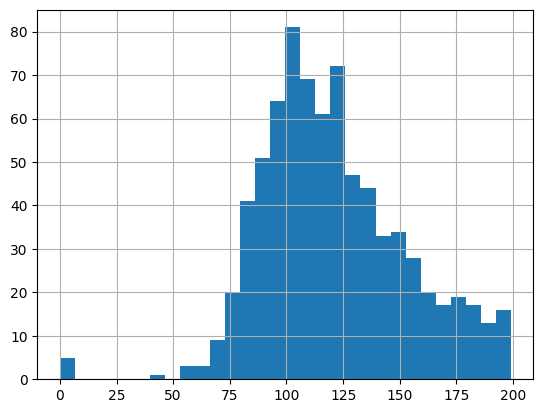

In [12]:
df['Glucose'].hist(bins=30)

<Axes: >

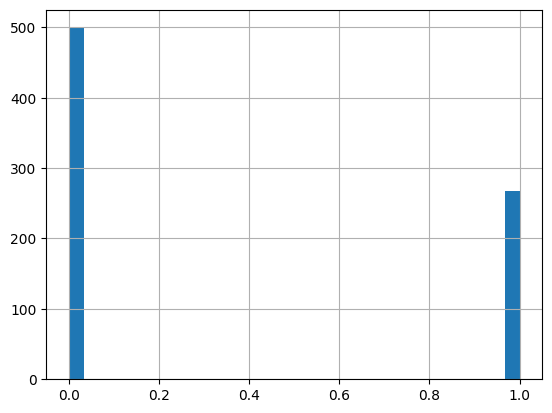

In [13]:
df['Outcome'].hist(bins=30)

<Axes: xlabel='Insulin'>

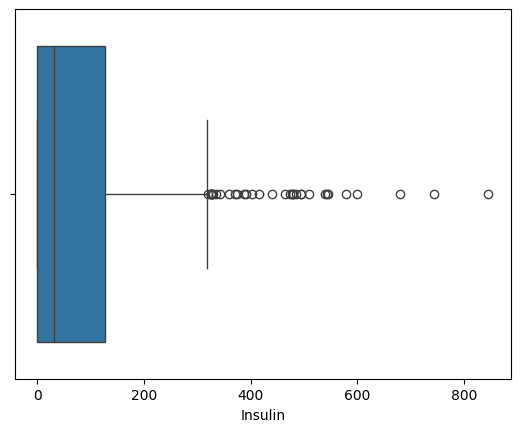

In [14]:
sns.boxplot(x=df['Insulin'])

# 4 Correlation

<Axes: >

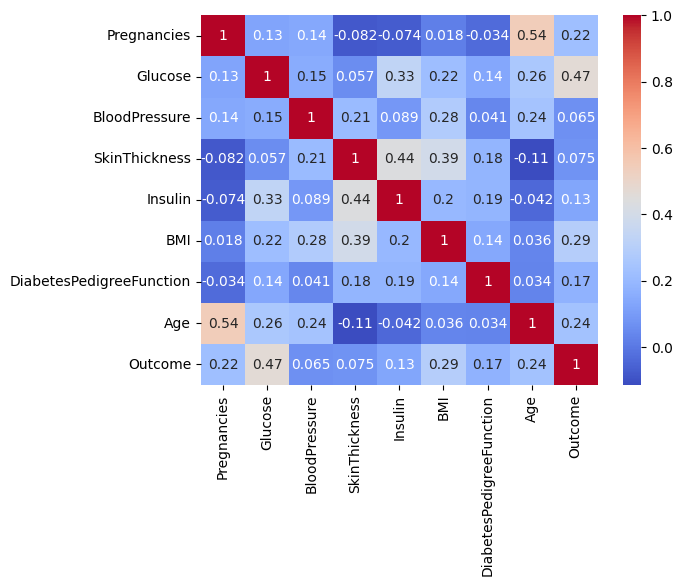

In [15]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# 5 Classification สมดุลไหม

In [16]:
df['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


# แบบฝึกหัด 1.1 ลองหาค่า Glucose mean = ???




# แบบฝึกหัด 1.2 ลองหาค่า Correlation Pregnancies กับ age = ???




#แบบฝึกหัด 1.3 จาก boxplot ของ Insulin พบว่ามี outliers อยู่หรือไม่? ถ้ามี ประมาณกี่ค่า?

# แบบฝึกหัด 1.4 ใน dataset นี้ column ไหนที่มี ค่า Missing values มากสุด

# แบบฝึกหัด 1.5 มี กี่ data จำนวนเท่าไร ที่ BMI > 40 และ Age > 50 พร้อมกัน?